# Synchrony Graph Statistics

In [13]:
from scipy.io import loadmat as loadmat
import matplotlib.pyplot as plt
import numpy as np
from graspologic.embed import AdjacencySpectralEmbed as ASE
from hyppo.ksample.ksamp import KSample as KSample
from hyppo.ksample import MANOVA as MANOVA
%matplotlib inline

In [79]:
disconnected_data = loadmat("matdata/disconnected.mat")
connected_data = loadmat("matdata/connected.mat")
dis_ctrl = disconnected_data['control_sync']
dis_gs = disconnected_data['galvanic_sync']
dis_ps = disconnected_data['pulse_sync']
con_ctrl = connected_data['control_sync']
con_gs = connected_data['galvanic_sync']
con_ps = connected_data['pulse_sync']
sync_mats = [dis_ctrl, dis_ps, dis_gs, con_ctrl, con_ps, con_gs]
mat_names = ["Disconnected Control",
             "Disconnected Pulse",
             "Disconnected Galvanic",
             "Connected Control",
             "Connected Pulse",
             "Connected Galvanic"]

Dealing with NaNs

In [80]:
# Need to figure out appropriate way to deal with NaNs
for sync_mat in sync_mats:
    sync_mat[np.isnan(sync_mat)] = 0

Embed Matrices with ASE

In [71]:
embedder = ASE(n_components=2)
left_latents, right_latents = [], []
for sync_mat in sync_mats:
    print(mat_names[i])
    print(embedder.is_fitted_)
    if "Disconnected Control" in mat_names[i]:
        embedder.fit(sync_mat)
    left, right = embedder.transform(sync_mat)
    left_latents.append(left)
    right_latents.append(right)

Connected Galvanic
False


AttributeError: 'AdjacencySpectralEmbed' object has no attribute 'latent_right_'

Visualize Embedded Matrices

Text(0.5, 1.0, 'Right Latents')

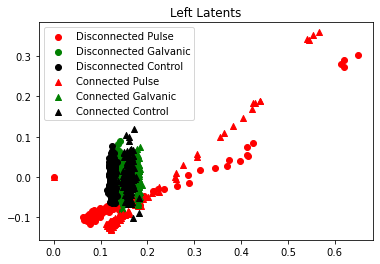

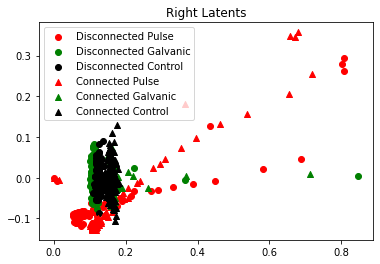

In [26]:
plt.figure()
plt.hold = True
for i, latent in enumerate(left_latents):
    if "Disconnected" in mat_names[i]:
        shape = "o"
    else:
        shape = "^"
    if "Pulse" in mat_names[i]:
        color = "red"
    elif "Galvanic" in mat_names[i]:
        color = "green"
    else:
        color = "k"
    plt.scatter(latent[:, 0], latent[:, 1], c=color, marker=shape, label=mat_names[i])
plt.hold = False
plt.legend()
plt.title("Left Latents")

plt.figure()
plt.hold = True
for i, latent in enumerate(right_latents):
    if "Disconnected" in mat_names[i]:
        shape = "o"
    else:
        shape = "^"
    if "Pulse" in mat_names[i]:
        color = "red"
    elif "Galvanic" in mat_names[i]:
        color = "green"
    else:
        color = "k"
    plt.scatter(latent[:, 0], latent[:, 1], c=color, marker=shape, label=mat_names[i])
plt.hold = False
plt.legend()
plt.title("Right Latents")

Embed Matrices with PCA

In [122]:
from sklearn.decomposition import PCA as PCA
embedder = PCA(n_components=1)

In [123]:
pca_latents = []
for i, sync_mat in enumerate(sync_mats):
    if mat_names[i] == "Disconnected Control":
        embedder.fit(sync_mat)
    latent = np.array(embedder.transform(sync_mat))
    pca_latents.append(latent)

Visualize Embedded Matrices

Text(0, 0.5, 'PC 2')

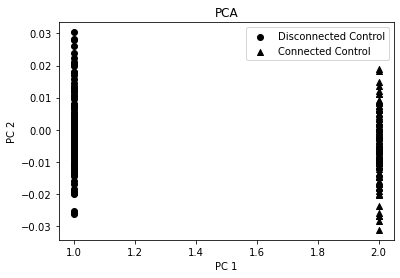

In [146]:
plt.figure()
plt.hold = True
for i, latent in enumerate(pca_latents):
    if "Disconnected" in mat_names[i]:
        shape = "o"
    else:
        shape = "^"
    if "Pulse" in mat_names[i]:
        color = "red"
    elif "Galvanic" in mat_names[i]:
        color = "green"
    else:
        color = "k"
    if "Control" in mat_names[i]:
        #plt.scatter(latent[:, 0], latent[:, 1], c=color, marker=shape, label=mat_names[i])
        if shape == "^":
            plt.scatter(2*np.ones(120), latent[:, 0], c=color, marker=shape, label=mat_names[i])
        else:
            plt.scatter(np.ones(120), latent[:, 0], c=color, marker=shape, label=mat_names[i])
            
plt.hold = False
plt.legend()
plt.title("PCA")
plt.xlabel("PC 1")
plt.ylabel("PC 2")

Distance Correlation 2-Sample test

In [132]:
dcorr = KSample("DCorr")
manova = MANOVA()
from scipy.stats import ttest_ind as t_test

Pairwise comparison of embedded synchrony matrices

In [142]:
dis_mean = np.mean(pca_latents[2])
dis_sem = np.std(pca_latents[2])
con_mean = np.mean(pca_latents[5])
con_sem = np.std(pca_latents[5])
print("Disconnected mean PC = {:.4f} +/- {:.4f}".format(dis_mean, dis_sem))
print("Connected mean PC = {:.4f} +/- {:.4f}".format(con_mean, con_sem))

Disconnected mean PC = -0.0030 +/- 0.0096
Connected mean PC = -0.0101 +/- 0.0050


In [135]:
t_test(pca_latents[2], pca_latents[5])

Ttest_indResult(statistic=array([7.2065742]), pvalue=array([7.54425451e-12]))

In [118]:
manova.test(pca_latents[0], pca_latents[1], pca_latents[2], pca_latents[3], pca_latents[4], pca_latents[5])

KSampleTestOutput(stat=0.21175106712422254, pvalue=2.8757314638607966e-29)

In [119]:
for i, latent in enumerate(pca_latents):
    for j, latent2 in enumerate(pca_latents[i+1:]):
        print("%s - %s" % (mat_names[i], mat_names[j+i+1]))
        #stat, p_val = dcorr.test(latent, latent2)
        stat, p_val = manova.test(latent, latent2)
        print("t={:.2f}; p={:.2e}".format(stat, p_val))

Disconnected Control - Disconnected Pulse
t=0.13; p=1.07e-07
Disconnected Control - Disconnected Galvanic
t=0.05; p=2.14e-03
Disconnected Control - Connected Control
t=0.03; p=3.84e-02
Disconnected Control - Connected Pulse
t=0.09; p=1.83e-05
Disconnected Control - Connected Galvanic
t=0.22; p=1.32e-13
Disconnected Pulse - Disconnected Galvanic
t=0.20; p=3.70e-12
Disconnected Pulse - Connected Control
t=0.16; p=8.72e-10
Disconnected Pulse - Connected Pulse
t=0.01; p=4.24e-01
Disconnected Pulse - Connected Galvanic
t=0.27; p=8.99e-17
Disconnected Galvanic - Connected Control
t=0.04; p=1.09e-02
Disconnected Galvanic - Connected Pulse
t=0.16; p=2.10e-09
Disconnected Galvanic - Connected Galvanic
t=0.13; p=1.33e-07
Connected Control - Connected Pulse
t=0.11; p=6.33e-07
Connected Control - Connected Galvanic
t=0.16; p=1.04e-09
Connected Pulse - Connected Galvanic
t=0.22; p=2.33e-13


Pairwise comparison of raw synchrony matrices

In [16]:
for i, sync_mat in enumerate(sync_mats):
    for j, sync_mat2 in enumerate(sync_mats[i+1:]):
        print("%s - %s" % (mat_names[i], mat_names[j+i+1]))
        stat, p_val = manova.test(sync_mat, sync_mat2)
        print("t={:.2f}; p={:.2e}".format(stat, p_val))
    

Disconnected Pulse - Disconnected Galvanic
t=0.20; p=1.00e+00
Disconnected Pulse - Disconnected Control
t=0.17; p=1.00e+00
Disconnected Pulse - Connected Pulse
t=0.04; p=1.00e+00
Disconnected Pulse - Connected Galvanic
t=0.22; p=1.00e+00
Disconnected Pulse - Connected Control
t=0.15; p=1.00e+00
Disconnected Galvanic - Disconnected Control
t=0.44; p=9.27e-01
Disconnected Galvanic - Connected Pulse
t=0.28; p=1.00e+00
Disconnected Galvanic - Connected Galvanic
t=0.58; p=4.50e-02
Disconnected Galvanic - Connected Control
t=0.40; p=9.88e-01
Disconnected Control - Connected Pulse
t=0.25; p=1.00e+00
Disconnected Control - Connected Galvanic
t=0.72; p=5.13e-07
Disconnected Control - Connected Control
t=0.29; p=1.00e+00
Connected Pulse - Connected Galvanic
t=0.19; p=1.00e+00
Connected Pulse - Connected Control
t=0.15; p=1.00e+00
Connected Galvanic - Connected Control
t=0.31; p=1.00e+00


Sytematically removing highest delta-p nodes

Connected Pulse vs Control

In [10]:
num_group = 120
num_iter = 100
small_ps = con_ps
small_ctrl = con_ctrl
p_vals = []
for j in range(num_iter):
    print(j)
    ps_left, ps_right = embedder.fit_transform(small_ps)
    ctrl_left, ctrl_right = embedder.fit_transform(small_ctrl)
    stat, base_p = dcorr.test(ps_left, ctrl_left)
    p_vals.append(base_p)
    delta_p = []
    group_idx = np.arange(num_group)
    for i in range(num_group):
        temp_ps = small_ps[group_idx!=i, :]
        temp_ps = temp_ps[:, group_idx!=i]
        ps_left, ps_right = embedder.fit_transform(temp_ps)
        temp_ctrl = small_ctrl[group_idx!=i, :]
        temp_ctrl = temp_ctrl[:, group_idx!=i]
        ctrl_left, ctrl_right = embedder.fit_transform(temp_ctrl)
        stat, p_val = dcorr.test(ps_left, ps_right)
        delta_p.append(p_val - base_p)
    large_idx = np.argmax(delta_p)
    small_ps = small_ps[group_idx!=large_idx, :]
    small_ps = small_ps[:, group_idx!=large_idx]
    small_ctrl = small_ctrl[group_idx!=large_idx, :]
    small_ctrl = small_ctrl[:, group_idx!=large_idx]
    num_group -= 1

0


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

1


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

2


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

3


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

4


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

5


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

6


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

7


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

8


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

9


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

10


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

11


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

12


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


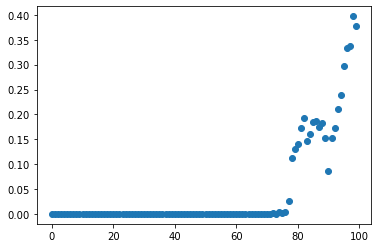

In [11]:
plt.figure()
plt.scatter(np.arange(num_iter), p_vals)

Connected Galvanic vs Control

In [8]:
num_group = 120
num_iter = 100
small_gs = con_gs
small_ctrl = con_ctrl
p_vals = []
for j in range(num_iter):
    print(j)
    gs_left, gs_right = embedder.fit_transform(small_gs)
    ctrl_left, ctrl_right = embedder.fit_transform(small_ctrl)
    stat, base_p = dcorr.test(gs_left, ctrl_left)
    p_vals.append(base_p)
    delta_p = []
    group_idx = np.arange(num_group)
    for i in range(num_group):
        temp_gs = small_gs[group_idx!=i, :]
        temp_gs = temp_gs[:, group_idx!=i]
        gs_left, gs_right = embedder.fit_transform(temp_gs)
        temp_ctrl = small_ctrl[group_idx!=i, :]
        temp_ctrl = temp_ctrl[:, group_idx!=i]
        ctrl_left, ctrl_right = embedder.fit_transform(temp_ctrl)
        stat, p_val = dcorr.test(gs_left, gs_right)
        delta_p.append(p_val - base_p)
    large_idx = np.argmax(delta_p)
    small_gs = small_gs[group_idx!=large_idx, :]
    small_gs = small_gs[:, group_idx!=large_idx]
    small_ctrl = small_ctrl[group_idx!=large_idx, :]
    small_ctrl = small_ctrl[:, group_idx!=large_idx]
    num_group -= 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


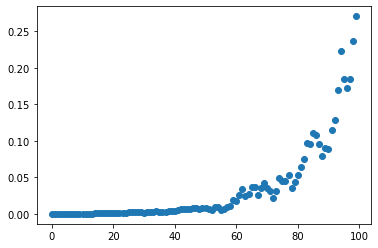

In [9]:
plt.figure()
plt.scatter(np.arange(num_iter), p_vals)

Disconnected Galvanic vs Control

In [12]:
num_group = 120
num_iter = 100
small_gs = dis_gs
small_ctrl = dis_ctrl
p_vals = []
for j in range(num_iter):
    print(j)
    gs_left, gs_right = embedder.fit_transform(small_gs)
    ctrl_left, ctrl_right = embedder.fit_transform(small_ctrl)
    stat, base_p = dcorr.test(gs_left, ctrl_left)
    p_vals.append(base_p)
    delta_p = []
    group_idx = np.arange(num_group)
    for i in range(num_group):
        temp_gs = small_gs[group_idx!=i, :]
        temp_gs = temp_gs[:, group_idx!=i]
        gs_left, gs_right = embedder.fit_transform(temp_gs)
        temp_ctrl = small_ctrl[group_idx!=i, :]
        temp_ctrl = temp_ctrl[:, group_idx!=i]
        ctrl_left, ctrl_right = embedder.fit_transform(temp_ctrl)
        stat, p_val = dcorr.test(gs_left, gs_right)
        delta_p.append(p_val - base_p)
    large_idx = np.argmax(delta_p)
    small_gs = small_gs[group_idx!=large_idx, :]
    small_gs = small_gs[:, group_idx!=large_idx]
    small_ctrl = small_ctrl[group_idx!=large_idx, :]
    small_ctrl = small_ctrl[:, group_idx!=large_idx]
    num_group -= 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


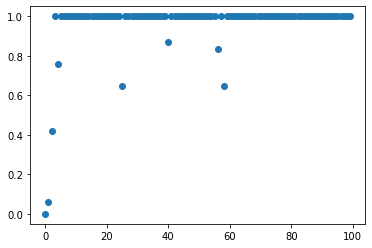

In [13]:
plt.figure()
plt.scatter(np.arange(num_iter), p_vals)

Disconnected Pulse vs Control

In [14]:
num_group = 120
num_iter = 100
small_gs = dis_ps
small_ctrl = dis_ctrl
p_vals = []
for j in range(num_iter):
    print(j)
    gs_left, gs_right = embedder.fit_transform(small_gs)
    ctrl_left, ctrl_right = embedder.fit_transform(small_ctrl)
    stat, base_p = dcorr.test(gs_left, ctrl_left)
    p_vals.append(base_p)
    delta_p = []
    group_idx = np.arange(num_group)
    for i in range(num_group):
        temp_gs = small_gs[group_idx!=i, :]
        temp_gs = temp_gs[:, group_idx!=i]
        gs_left, gs_right = embedder.fit_transform(temp_gs)
        temp_ctrl = small_ctrl[group_idx!=i, :]
        temp_ctrl = temp_ctrl[:, group_idx!=i]
        ctrl_left, ctrl_right = embedder.fit_transform(temp_ctrl)
        stat, p_val = dcorr.test(gs_left, gs_right)
        delta_p.append(p_val - base_p)
    large_idx = np.argmax(delta_p)
    small_gs = small_gs[group_idx!=large_idx, :]
    small_gs = small_gs[:, group_idx!=large_idx]
    small_ctrl = small_ctrl[group_idx!=large_idx, :]
    small_ctrl = small_ctrl[:, group_idx!=large_idx]
    num_group -= 1

0


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

1


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

2


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

3


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

4


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

5


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

6


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

7


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

8


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

9


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

10


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

11


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

12


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

13


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

14


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

15


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

16


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

17


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

18


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

19


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

20


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

21


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

22


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

23


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

24


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

25


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

26


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

27


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

28


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

29


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

30


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

31


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

32


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

33


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

34


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

35


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

36


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

37


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

38


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

39


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

40


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

41


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

42


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

43


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

44


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

45


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

46


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

47


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

48


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

49


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

50


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

51


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

52


/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Results may notbe optimal. You can compute the largest connected component byusing ``graspologic.utils.largest_connected_component``.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/graspologic/embed/base.py:187: UserWarning: Input graph is not fully connected. Resu

53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


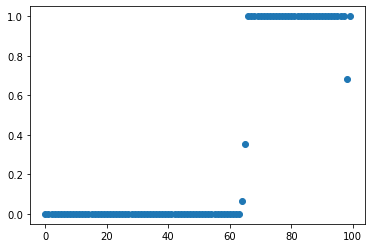

In [15]:
plt.figure()
plt.scatter(np.arange(num_iter), p_vals)

Disconnected Control vs Connected Control

In [8]:
num_group = 120
num_iter = 115
small_gs = con_ctrl
small_ctrl = dis_ctrl
p_vals = []
for j in range(num_iter):
    print(j)
    gs_left, gs_right = embedder.fit_transform(small_gs)
    ctrl_left, ctrl_right = embedder.fit_transform(small_ctrl)
    stat, base_p = dcorr.test(gs_left, ctrl_left)
    p_vals.append(base_p)
    delta_p = []
    group_idx = np.arange(num_group)
    for i in range(num_group):
        temp_gs = small_gs[group_idx!=i, :]
        temp_gs = temp_gs[:, group_idx!=i]
        gs_left, gs_right = embedder.fit_transform(temp_gs)
        temp_ctrl = small_ctrl[group_idx!=i, :]
        temp_ctrl = temp_ctrl[:, group_idx!=i]
        ctrl_left, ctrl_right = embedder.fit_transform(temp_ctrl)
        stat, p_val = dcorr.test(gs_left, gs_right)
        delta_p.append(p_val - base_p)
    large_idx = np.argmax(delta_p)
    small_gs = small_gs[group_idx!=large_idx, :]
    small_gs = small_gs[:, group_idx!=large_idx]
    small_ctrl = small_ctrl[group_idx!=large_idx, :]
    small_ctrl = small_ctrl[:, group_idx!=large_idx]
    num_group -= 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114


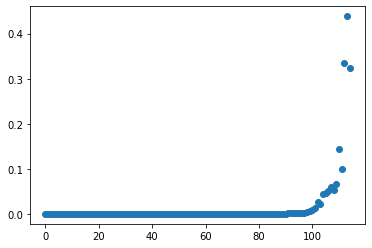

In [9]:
plt.figure()
plt.scatter(np.arange(num_iter), p_vals)